Linear regression program that goes from manual data  to calculation to prediction to visualization using only basic Python without using sklearn.

In [49]:
import matplotlib.pyplot as plt

Independent variable (x) -> Diameter of Pizza
Dependent variable (y) -> Price of Pizza

In [50]:
x=[8,10,12]
y=[10,13,16]

Calculate the means of x and y

In [51]:
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

Calculating the slope(m)

In [52]:
numerator = 0
denominator = 0

In [53]:
for i in range(len(x)):
    numerator += (x[i] - mean_x) * (y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2

In [54]:
m = numerator / denominator
b = mean_y - (m * mean_x)

In [55]:
print(f"Equation of the line: y = {m:.2f}x + {b:.2f}")

Equation of the line: y = 1.50x + -2.00


Predict price for a new diameter

In [56]:
new_diameter = 20
predicted_price = m * new_diameter + b
print(f"Predicted price for a {new_diameter}-inch pizza: ${predicted_price:.2f}")

Predicted price for a 20-inch pizza: $28.00


plot original data points

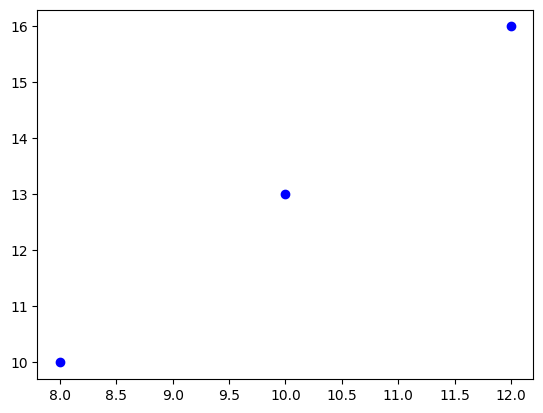

In [57]:
plt.scatter(x, y, color='blue', label='Original Data')

plot regression line

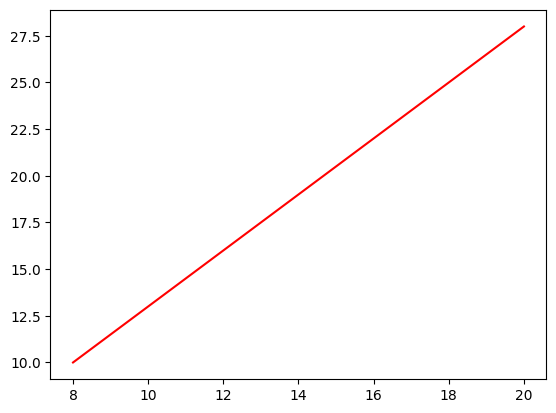

In [58]:
x_line = [min(x), max(x), new_diameter]
y_line = [m * xi + b for xi in x_line]
plt.plot(x_line, y_line, color='red', label='Regression Line')

Plot the predicted point

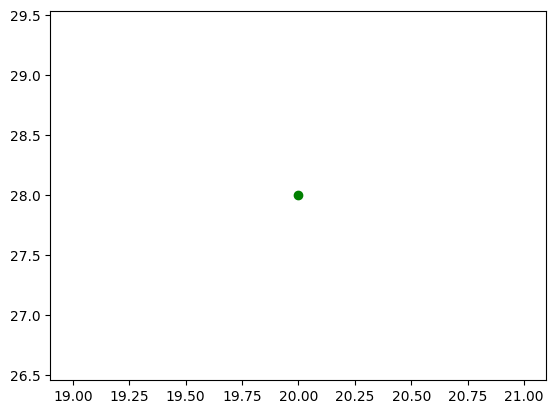

In [59]:
plt.scatter(new_diameter, predicted_price, color='green', label=f'Predicted Price (${predicted_price:.2f})')

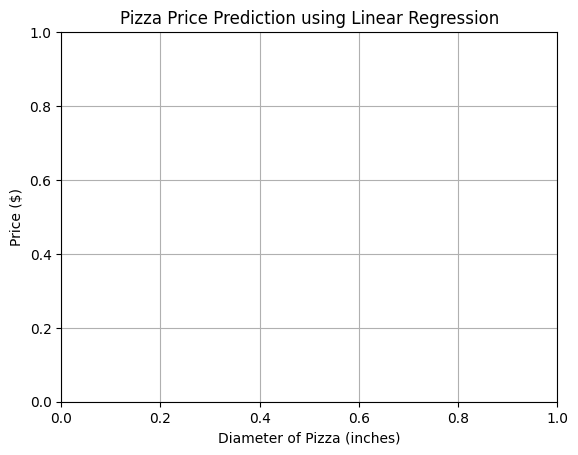

In [60]:
plt.xlabel('Diameter of Pizza (inches)')
plt.ylabel('Price ($)')
plt.title('Pizza Price Prediction using Linear Regression')
plt.grid(True)
plt.show()

Linear regression program that goes with python libraries


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
df = pd.read_csv('pizza.csv')

In [63]:
print(df.head())

   Diameter  Price
0         6      7
1         8     10
2        10     15
3        12     20
4        14     22


In [64]:
print("DatasetOverview:\n")
print(df.describe())

DatasetOverview:

        Diameter      Price
count   8.000000   8.000000
mean   13.000000  19.500000
std     4.898979   8.194075
min     6.000000   7.000000
25%     9.500000  13.750000
50%    13.000000  21.000000
75%    16.500000  25.500000
max    20.000000  30.000000


In [65]:
X=df[['Diameter']]
y=df['Price']

Split into training and test sets:

In [66]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
print(f"\n Training samples : {len(X_train)}")
print(f"\n Testing samples : {len(X_test)}")


 Training samples : 6

 Testing samples : 2


Train the model

In [68]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
slope= model.coef_[0]
intercept = model.intercept_

In [70]:
print(f"\n Model Equation: y = {slope:.2f}x + {intercept:.2f}")


 Model Equation: y = 1.59x + -1.10


In [71]:
y_pred = model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

In [73]:
print(f"\n Mean Squared Error: {mse:.2f}")
print(f" R² Score: {r2:.4f}")


 Mean Squared Error: 1.55
 R² Score: 0.9725


In [74]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

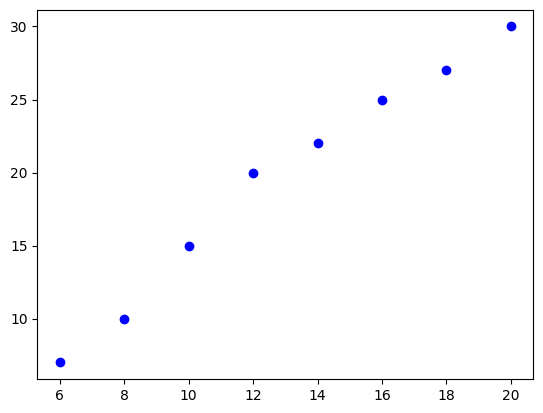

In [75]:
plt.scatter(X, y, color='blue', label='Actual Data')

Regression line based on all x

C:\Users\dell\AppData\Local\Temp\ipykernel_12232\1540206933.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_line = pd.DataFrame({'Diameter': range(int(X.min()), int(X.max()) + 1)})


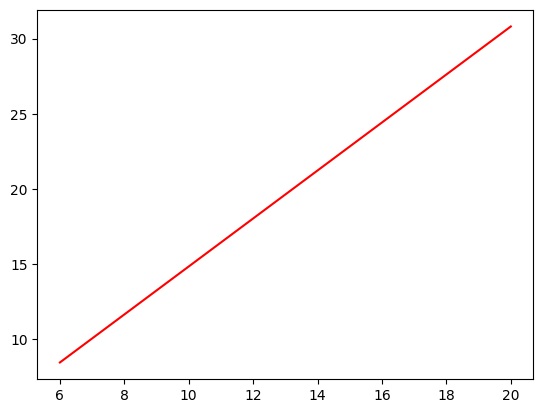

In [76]:
x_line = pd.DataFrame({'Diameter': range(int(X.min()), int(X.max()) + 1)})
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression Line')

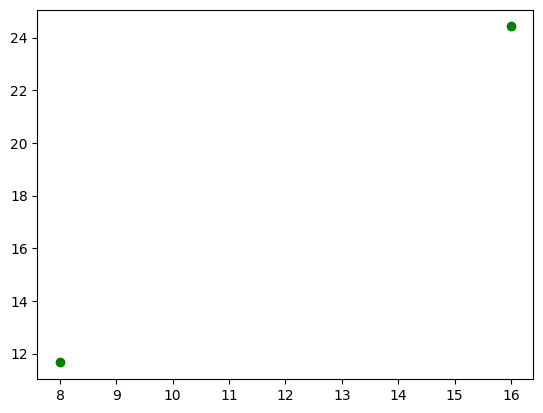

In [77]:
plt.scatter(X_test, y_pred, color='green', label='Predicted on Test Set')

C:\Users\dell\AppData\Local\Temp\ipykernel_12232\1270009107.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


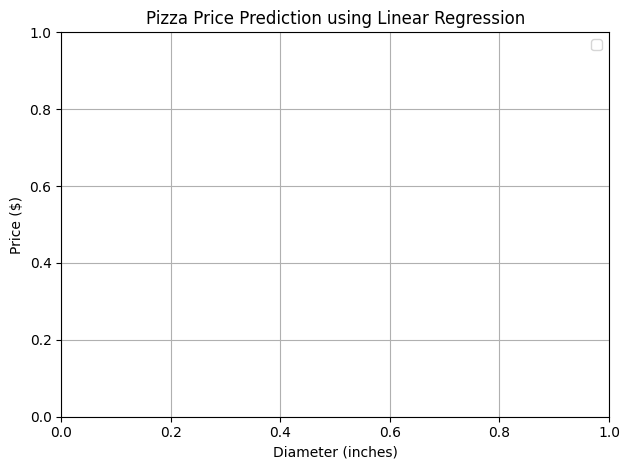

In [78]:
plt.title('Pizza Price Prediction using Linear Regression')
plt.xlabel('Diameter in inches')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()